In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rlway.pyosrd import OSRD

In [3]:
OSRD.use_cases

['cvg_dvg', 'divergence', 'station_capacity2']

In [4]:
sim = OSRD(use_case='divergence')

OSRD post_init


[16:31:31,113] [DEBUG]             [Allowance] computing range n°1
[16:31:31,136] [DEBUG]             [Allowance]   computing section n°1
[16:31:31,138] [DEBUG]             [Allowance]   target time = 471.66945
[16:31:31,138] [DEBUG]             [Allowance]     starting attempt 1
[16:31:31,154] [DEBUG]             [Allowance]     envelope time 809.252
[16:31:31,155] [DEBUG]             [Allowance]     starting attempt 2
[16:31:31,156] [DEBUG]             [Allowance]     envelope time 577.684
[16:31:31,157] [DEBUG]             [Allowance]     starting attempt 3
[16:31:31,160] [DEBUG]             [Allowance]     envelope time 505.361
[16:31:31,161] [DEBUG]             [Allowance]     starting attempt 4
[16:31:31,164] [DEBUG]             [Allowance]     envelope time 475.49
[16:31:31,166] [DEBUG]             [Allowance]     starting attempt 5
[16:31:31,168] [DEBUG]             [Allowance]     envelope time 462.012
[16:31:31,169] [DEBUG]             [Allowance]     starting attempt 6
[16:3

In [8]:
sim.routes

['rt.D0->buffer_stop.2',
 'rt.D0->buffer_stop.1',
 'rt.buffer_stop.0->D0',
 'rt.D1->buffer_stop.0',
 'rt.buffer_stop.1->D1',
 'rt.D2->buffer_stop.0',
 'rt.buffer_stop.2->D2']

In [55]:
route_release_detectors = {}

for route in sim.infra['routes']:
    detector, output = route['id'].replace('rt.','').split('->')
    if route['release_detectors']:
        outputs = route['release_detectors']
    else:
        outputs = [output]
    for output in outputs:
        route_release_detectors[route['id']] = f"{detector}->{output}"

# {
#     route: '<->'.join(sorted(tvd.split('->')))
#     for route, tvd in route_release_detectors.items()
# }    

route_release_detectors

{'rt.D0->buffer_stop.2': 'D0->D2',
 'rt.D0->buffer_stop.1': 'D0->D1',
 'rt.buffer_stop.0->D0': 'buffer_stop.0->D0',
 'rt.D1->buffer_stop.0': 'D1->D0',
 'rt.buffer_stop.1->D1': 'buffer_stop.1->D1',
 'rt.D2->buffer_stop.0': 'D2->D0',
 'rt.buffer_stop.2->D2': 'buffer_stop.2->D2'}

In [64]:
{
    route['id']: '<->'.join(sorted(route['id'].replace('rt.','').split('->')))
    if not route['switches_directions'] else list( route['switches_directions'].keys())[0]
    for route in sim.infra['routes']
}
    

{'rt.D0->buffer_stop.2': 'DVG',
 'rt.D0->buffer_stop.1': 'DVG',
 'rt.buffer_stop.0->D0': 'D0<->buffer_stop.0',
 'rt.D1->buffer_stop.0': 'DVG',
 'rt.buffer_stop.1->D1': 'D1<->buffer_stop.1',
 'rt.D2->buffer_stop.0': 'DVG',
 'rt.buffer_stop.2->D2': 'D2<->buffer_stop.2'}

(0.0, 8.28087732145242)

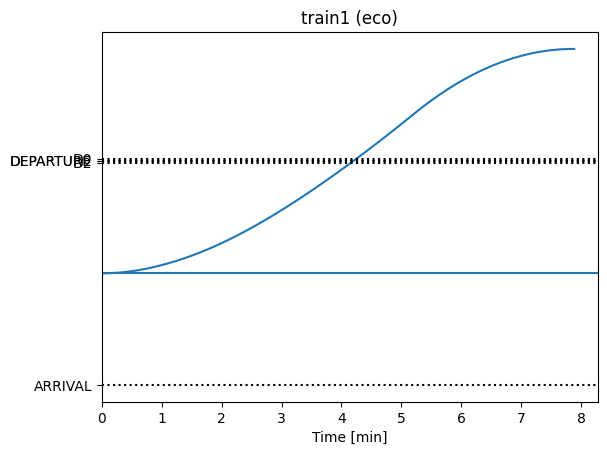

In [6]:
import matplotlib.pyplot as plt

sim.space_time_graph(1, types_to_show=['switch','detector','departure','arrival'])
plt.axhline(0)
plt.xlim(left=0)

In [7]:
sim.points_encountered_by_train(0)

[{'id': 'DEPARTURE',
  'type': 'departure',
  'path_offset': 0.0,
  't_min': 0.0,
  't': 0.0},
 {'id': 'S0',
  'type': 'signal',
  'path_offset': 9800.0,
  't_min': 421.2103472703495,
  't': 442.76044490007587},
 {'id': 'D0',
  'type': 'detector',
  'path_offset': 9820.0,
  't_min': 422.6389186989209,
  't': 444.2621053540149},
 {'id': 'DVG',
  'type': 'switch',
  'path_offset': 10000.0,
  't_min': 450.2103472703495,
  't': 473.19298979728114},
 {'id': 'D1',
  'type': 'detector',
  'path_offset': 10180.0,
  't_min': 450.2103472703495,
  't': 473.19298979728114},
 {'id': 'S1',
  'type': 'signal',
  'path_offset': 10200.0,
  't_min': 450.2103472703495,
  't': 473.19298979728114},
 {'id': 'ARRIVAL',
  'type': 'arrival',
  'path_offset': 19900.0,
  't_min': 450.2103472703495,
  't': 473.19298979728114}]